In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
primaries = pd.read_csv("data/parsed_primaries_edited.csv")

In [3]:
senate = pd.read_csv("data/parsed_senate.csv")

In [4]:
primaries['Party'] = primaries['Party'].apply(lambda x: 'L/NP' if x in ["LP","NP","LNP","LPNP","CLP"] else x)
senate['Party'] = senate['Party'].apply(lambda x: 'L/NP' if x in ["LP","NP","LNP","LPNP","CLP"] else x)

In [5]:
main_df = primaries.merge(senate, on=['Division', 'Party','State'])
main_df = main_df[["Division","State","Party","Name","Gender","Primary Vote","Senate Vote"]]

In [6]:
senate

,Division,State,Party,Senate Vote
0,Bean,ACT,ALP,0.328854
1,Bean,ACT,GRN,0.082705
2,Bean,ACT,L/NP,0.271726
3,Bean,ACT,UAPP,0.023955
4,Canberra,ACT,ALP,0.326715
...,...,...,...,...
745,Tangney,WA,ALP,0.346886
746,Tangney,WA,GRN,0.138500
747,Tangney,WA,L/NP,0.372860
748,Tangney,WA,ON,0.016978


In [7]:
senate[senate["Division"]=="Banks"]

,Division,State,Party,Senate Vote
12,Banks,NSW,ALP,0.340299
13,Banks,NSW,GRN,0.085352
14,Banks,NSW,L/NP,0.391445
15,Banks,NSW,ON,0.031452
16,Banks,NSW,UAPP,0.045183


In [8]:
main_df["Personal Vote"] = main_df["Primary Vote"] - main_df["Senate Vote"]

In [9]:
main_df

,Division,State,Party,Name,Gender,Primary Vote,Senate Vote,Personal Vote
0,Bean,ACT,UAPP,Sean Conway,1,0.027944,0.023955,0.003989
1,Bean,ACT,ALP,David Smith,1,0.405295,0.328854,0.076441
2,Bean,ACT,GRN,Kathryn jane Savery,0,0.143709,0.082705,0.061004
3,Bean,ACT,L/NP,Jane Hiatt,0,0.288632,0.271726,0.016905
4,Canberra,ACT,UAPP,Catherine Smith,0,0.017949,0.014832,0.003116
...,...,...,...,...,...,...,...,...
747,Tangney,WA,ON,Tshung-hui Chang,1,0.020462,0.016978,0.003484
748,Tangney,WA,UAPP,Travis llewellyn Mark,1,0.015391,0.015524,-0.000133
749,Tangney,WA,ALP,Sam Lim,1,0.366127,0.346886,0.019242
750,Tangney,WA,L/NP,Ben Morton,1,0.384622,0.372860,0.011762


In [10]:
main_df[main_df["Gender"]==0]["Primary Vote"]

2      0.143709
3      0.288632
4      0.017949
7      0.440845
11     0.163025
         ...   
736    0.280374
739    0.014846
740    0.209243
743    0.370161
745    0.303994
Name: Primary Vote, Length: 291, dtype: float64

Text(0, 0.5, 'Senate Vote')

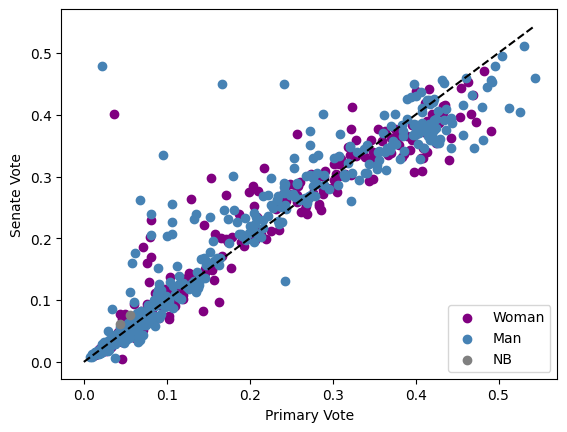

In [11]:
colormap = {0: 'purple', 1: 'steelblue',2:'grey'}
labels = {0: 'Woman', 1: 'Man',2:'NB'}

for color_val in colormap:
    plt.scatter(
        main_df[main_df["Gender"]==color_val]["Primary Vote"],
        main_df[main_df["Gender"]==color_val]["Senate Vote"],
        c=colormap[color_val],
        label=labels[color_val]
    )

plt.legend()
plt.plot([0,max(main_df["Primary Vote"])],[0,max(main_df["Primary Vote"])],'--k',)
plt.xlabel("Primary Vote")
plt.ylabel("Senate Vote")

In [12]:
main_df.sort_values(by="Personal Vote",ascending=False)

,Division,State,Party,Name,Gender,Primary Vote,Senate Vote,Personal Vote
8,Fenner,ACT,ALP,Andrew Leigh,1,0.470079,0.346232,0.123847
642,Melbourne,VIC,GRN,Adam Bandt,1,0.481241,0.359178,0.122063
556,Gippsland,VIC,L/NP,Darren Chester,1,0.525443,0.403690,0.121752
217,Sydney,NSW,ALP,Tanya Plibersek,0,0.491540,0.372902,0.118638
7,Canberra,ACT,ALP,Alicia Payne,0,0.440845,0.326715,0.114130
...,...,...,...,...,...,...,...,...
655,Nicholls,VIC,L/NP,Sam Birrell,1,0.240793,0.450374,-0.209580
702,Durack,WA,L/NP,Ian Blayney,1,0.095674,0.334552,-0.238879
656,Nicholls,VIC,L/NP,Steve Brooks,1,0.166299,0.450374,-0.284075
592,Indi,VIC,L/NP,Liz Fisher,0,0.035870,0.400743,-0.364873


In [35]:
main_df[main_df["Gender"]==2]

,Division,State,Party,Name,Gender,Primary Vote,Senate Vote,Personal Vote
86,Fowler,NSW,GRN,Avery Howard,2,0.043656,0.061152,-0.017496
321,Groom,QLD,GRN,Mickey Berry,2,0.055735,0.076112,-0.020376


In [13]:
main_df[main_df["Division"]=="Grayndler"]

,Division,State,Party,Name,Gender,Primary Vote,Senate Vote,Personal Vote
92,Grayndler,NSW,UAPP,David bruce Smith,1,0.021210,0.015027,0.006183
93,Grayndler,NSW,ALP,Anthony Albanese,1,0.512064,0.411194,0.100870
94,Grayndler,NSW,L/NP,Ben Zhang,1,0.152550,0.177613,-0.025063
95,Grayndler,NSW,ON,Paul Henselin,1,0.014628,0.012382,0.002246
96,Grayndler,NSW,GRN,Rachael Jacobs,0,0.210447,0.275879,-0.065433


In [48]:
personalvotebygenderandparty = (main_df.groupby(by=["Party","Gender"])["Personal Vote"].mean()*100).round(2)
personalvotebygenderandparty.name = "Mean personal vote (%)"
personalvotebygenderandparty

Party  Gender
ALP    0         1.30
       1         0.06
GRN    0        -0.65
       1        -0.91
       2        -1.89
L/NP   0        -2.11
       1        -1.52
ON     0         0.22
       1         0.47
UAPP   0         0.47
       1         0.41
Name: Mean personal vote (%), dtype: float64

In [36]:
# What facts
# Men vs women seats specifically
women = main_df[(main_df["Party"]=="ALP") & (main_df["Gender"]==0)]["Personal Vote"].mean()
men = main_df[(main_df["Party"]=="ALP") & (main_df["Gender"]==1)]["Personal Vote"].mean()



In [37]:
(women-men)*100

1.2390574248327562